In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import matplotlib.pyplot as plt
import IPython
print('GetDist Version: %s, Matplotlib version: %s'%(getdist.__version__, plt.matplotlib.__version__))

GetDist Version: 1.4.7, Matplotlib version: 3.7.5


In [3]:
import joblib
logage, mh, dm, Av, fb, alpha = 8.5, 0.0, 10.0, 0.3, 0.3, 2.0
path_list = [(f'/home/shenyueyue/Projects/starcat/script/dynesty_tests/uncertainty/'
              f'H2P_eps1e-2_0{i+1}.dsample') for i in range(4)]
test_results = []
for path in path_list:
    dsampler = joblib.load(path)
    results = dsampler.results
    test_results.append(results)

In [45]:
labels = ['log(age)', '[M/H]', 'DM', 'A_v', 'f_b', '\\alpha']
names = ['logage', 'mh', 'dm', 'Av', 'fb', 'alpha']
samps1 = test_results[0].samples
samps2 = test_results[1].samples
samps3 = test_results[2].samples
samps4 = test_results[3].samples
wt1 = test_results[0].importance_weights()
wt2 = test_results[1].importance_weights()
wt3 = test_results[2].importance_weights()
wt4 = test_results[3].importance_weights()

In [46]:
samples1 = MCSamples(samples=samps1, weights=wt1, names=names, labels=labels, label='Test 1')  
samples2 = MCSamples(samples=samps2, weights=wt2, names=names, labels=labels, label='Test 2')  
samples3 = MCSamples(samples=samps3, weights=wt3, names=names, labels=labels, label='Test 3')  
samples4 = MCSamples(samples=samps4, weights=wt4, names=names, labels=labels, label='Test 4')  

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


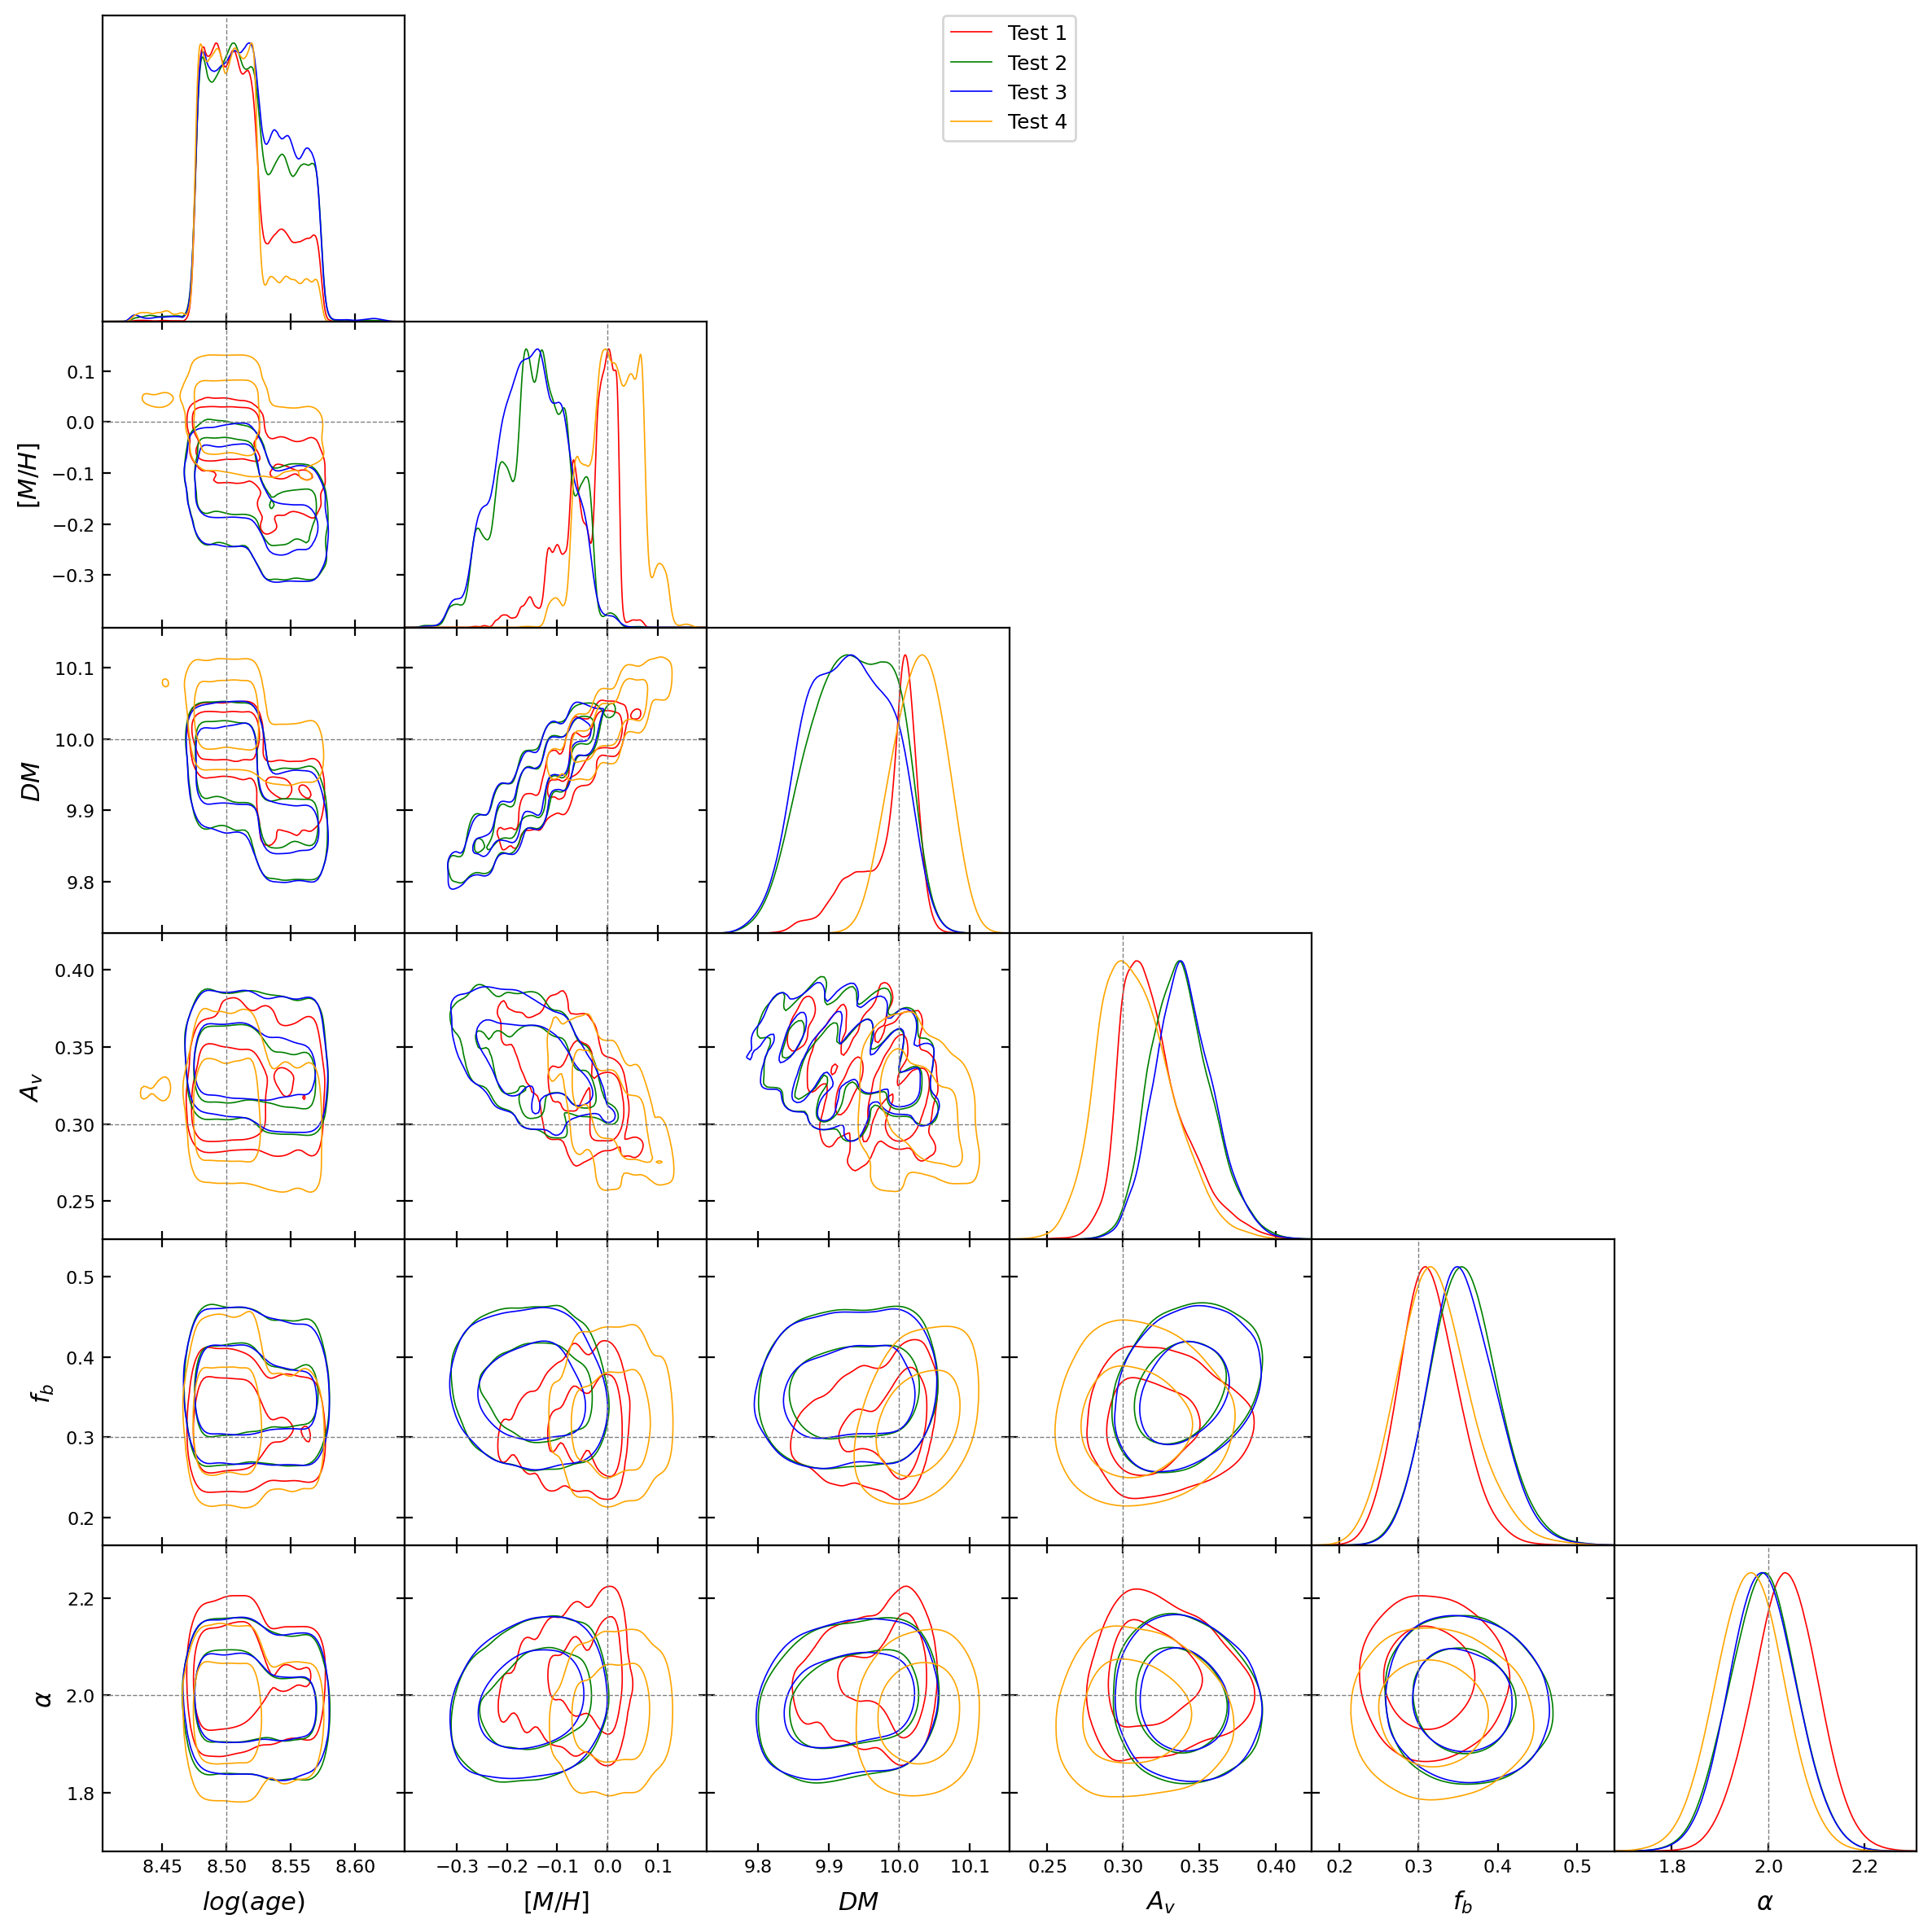

In [52]:
# Triangle plot
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([samples1, samples2, samples3, samples4], 
                contour_colors=['red', 'green', 'blue', 'orange'], filled=False,
                markers={'logage':8.5, 'mh':0.0, 'dm':10.0, 'Av':0.3, 'fb':0.3, 'alpha':2.0})  
# logage, mh, dm, Av, fb, alpha = 8.5, 0.0, 10.0, 0.3, 0.3, 2.0